In [2]:
print("Analysis")
print("Observed Trend 1: The more urban the area, the lower the average fare.")
print("Observed Trend 2: The more urban the area, the higher the number of rides.")
print("Observed Trend 3: The more urban the area, the higher the number of drivers.")


Analysis
Observed Trend 1: The more urban the area, the lower the average fare.
Observed Trend 2: The more urban the area, the higher the number of rides.
Observed Trend 3: The more urban the area, the higher the number of drivers.


In [5]:
# Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Read CSV
city_data_df = pd.read_csv("city_data.csv")
#city_data_df.head()
#type(city_data_df)
#city_data_df.dtypes
#city_data_df.shape
#city_data_df.columns

In [7]:
# Read CSV
ride_data_df = pd.read_csv("ride_data.csv")
#ride_data_df.head()
#type(ride_data_df)
#ride_data_df.dtypes
#ride_data_df.shape
#ride_data_df.columns

In [8]:
Average_FareL1_df = ride_data_df[["city", "fare"]]
Average_FareL2_df = Average_FareL1_df.groupby("city").mean().reset_index()
Average_FareL2_df = Average_FareL2_df.rename(columns = {"fare":"Average Fare"})

In [9]:
RideCountL1_df = ride_data_df[["city", "fare"]]
RideCountL2_df = RideCountL1_df.groupby("city").count().reset_index()
RideCountL2_df = RideCountL2_df.rename(columns = {"fare":"Total Number of Rides"})

In [10]:
TypeToColor_dict = {"type":["Urban", "Suburban", "Rural"],"Color":["lightcoral","gold","lightskyblue"]}
#type(TypeToColor_dict)
TypeToColor_df = pd.DataFrame(TypeToColor_dict)
#TypeToColor_df.head()

In [11]:
BubblePlotL1_df = pd.merge(city_data_df,RideCountL2_df, on=["city"])
BubblePlotL2_df = pd.merge(BubblePlotL1_df,Average_FareL2_df, on=["city"])
BubblePlotL3_df = pd.merge(BubblePlotL2_df,TypeToColor_df, on=["type"])
BubblePlotL3_df = BubblePlotL3_df.rename(columns = {"city":"City", "driver_count":"Driver Count", "type":"Type"})
#BubblePlotL3_df.head()

In [12]:
BubblePlotL3Urban_df = BubblePlotL3_df[BubblePlotL3_df.Type=="Urban"]
BubblePlotL3Suburban_df = BubblePlotL3_df[BubblePlotL3_df.Type=="Suburban"]
BubblePlotL3Rural_df = BubblePlotL3_df[BubblePlotL3_df.Type=="Rural"]

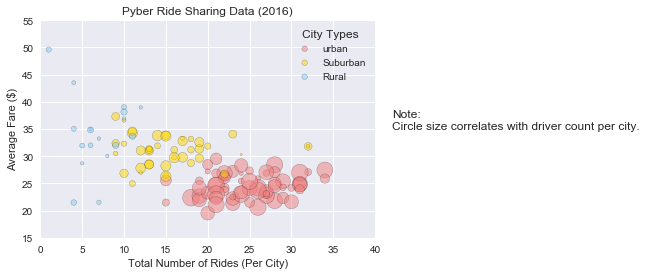

In [13]:
sns.set()
plt.grid(True)

#Plot Urban
x = BubblePlotL3Urban_df["Total Number of Rides"]
y = BubblePlotL3Urban_df["Average Fare"]
colors = BubblePlotL3Urban_df["Color"]
area = 4*BubblePlotL3Urban_df["Driver Count"]
classes = BubblePlotL3Urban_df["Type"]
plt.scatter(x, y, c=colors, s=area, alpha=0.5, edgecolor='black', label="urban")

#Plot Suburban
x = BubblePlotL3Suburban_df["Total Number of Rides"]
y = BubblePlotL3Suburban_df["Average Fare"]
colors = BubblePlotL3Suburban_df["Color"]
area = 4*BubblePlotL3Suburban_df["Driver Count"]
classes = BubblePlotL3Suburban_df["Type"]
plt.scatter(x, y, c=colors, s=area, alpha=0.5, edgecolor='black', label="Suburban")

#Plot Rural
x = BubblePlotL3Rural_df["Total Number of Rides"]
y = BubblePlotL3Rural_df["Average Fare"]
colors = BubblePlotL3Rural_df["Color"]
area = 4*BubblePlotL3Rural_df["Driver Count"]
plt.scatter(x, y, c=colors, s=area, alpha=0.5, edgecolor='black', label="Rural")

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types", labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)");
 

plt.xlim(0,40)
plt.ylim(15,55)



#plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='gray', edgecolor='h')
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

plt.show()

In [14]:
# % of Total Fares by City Type

TotalFaresbyCityType_df = BubblePlotL3_df
TotalFaresbyCityType_df["Total Fares"]=TotalFaresbyCityType_df["Total Number of Rides"]*TotalFaresbyCityType_df["Average Fare"]

In [15]:
TotalFaresbyCityTypeL1_df = TotalFaresbyCityType_df[["Type", "Total Fares"]]
TotalFaresbyCityTypeL2_df = TotalFaresbyCityTypeL1_df.groupby("Type").sum().reset_index()
TotalFaresbyCityTypeL3_df = pd.merge(TotalFaresbyCityTypeL2_df,TypeToColor_df, left_on="Type", right_on="type")
#TotalFaresbyCityTypeL3_df

In [16]:
plt.title("% Total Fares by City Type")

# Labels for the sections of our pie chart
labels = TotalFaresbyCityTypeL3_df["Type"]

# The values of each section of the pie chart
sizes = TotalFaresbyCityTypeL3_df["Total Fares"]

# The colors of each section of the pie chart
colors = TotalFaresbyCityTypeL3_df["Color"]

# Tells matplotlib to seperate the first section from the others
explode = (0, 0, 0.1)

In [17]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(x=sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x28fcedf4cc0>,
 [Text(-0.969829,0.519068,'Rural'),
  Text(-0.839065,-0.711316,'Suburban'),
  Text(1.05512,0.571596,'Urban')],
 [Text(-0.528998,0.283128,'6.6%'),
  Text(-0.457672,-0.387991,'31.4%'),
  Text(0.615487,0.333431,'62.0%')])

In [18]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1176639226730507,
 1.1945670777444062,
 -1.1162114572424728,
 1.1625457019480223)

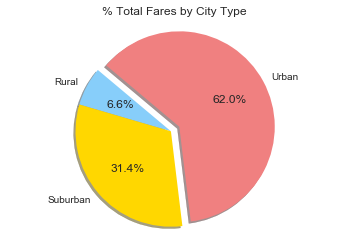

In [19]:
# Prints our pie chart to the screen
plt.show()

In [20]:
# % of Total Rides by City Type

TotalRidesbyCityType_df = BubblePlotL3_df
#TotalRidesbyCityType_df.head()

In [21]:
TotalRidesbyCityTypeL1_df = TotalRidesbyCityType_df[["Type", "Total Number of Rides"]]
TotalRidesbyCityTypeL2_df = TotalRidesbyCityTypeL1_df.groupby("Type").sum().reset_index()
TotalRidesbyCityTypeL3_df = pd.merge(TotalRidesbyCityTypeL2_df,TypeToColor_df, left_on="Type", right_on="type")
TotalRidesbyCityTypeL3_df

,Type,Total Number of Rides,Color,type
0,Rural,125,lightskyblue,Rural
1,Suburban,657,gold,Suburban
2,Urban,1625,lightcoral,Urban


In [22]:
plt.title("% Total Rides by City Type")

# Labels for the sections of our pie chart
labels = TotalRidesbyCityTypeL3_df["Type"]

# The values of each section of the pie chart
sizes = TotalRidesbyCityTypeL3_df["Total Number of Rides"]

# The colors of each section of the pie chart
colors = TotalRidesbyCityTypeL3_df["Color"]

# Tells matplotlib to seperate the first section from the others
explode = (0, 0, 0.1)

In [23]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(x=sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x28fcf08ea58>,
 [Text(-0.946305,0.560809,'Rural'),
  Text(-0.972796,-0.513487,'Suburban'),
  Text(1.13812,0.380357,'Urban')],
 [Text(-0.516166,0.305896,'5.2%'),
  Text(-0.530616,-0.280084,'27.3%'),
  Text(0.663906,0.221875,'67.5%')])

In [24]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1123696934546474,
 1.2158375011175826,
 -1.0841229924841567,
 1.1488001653602169)

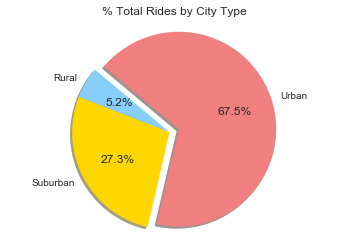

In [25]:
# Prints our pie chart to the screen
plt.show()

In [26]:
# % of Total Drivers by City Type

TotalDriversbyCityType_df = BubblePlotL3_df
#TotalDriversbyCityType_df.head()

In [28]:
TotalDriversbyCityTypeL1_df = TotalDriversbyCityType_df[["Type", "Driver Count"]]
TotalDriversbyCityTypeL2_df = TotalDriversbyCityTypeL1_df.groupby("Type").sum().reset_index()
TotalDriversbyCityTypeL3_df = pd.merge(TotalDriversbyCityTypeL2_df,TypeToColor_df, left_on="Type", right_on="type")
#TotalDriversbyCityTypeL3_df

In [29]:
plt.title("% Total Drivers by City Type")

# Labels for the sections of our pie chart
labels = TotalDriversbyCityTypeL3_df["Type"]

# The values of each section of the pie chart
sizes = TotalDriversbyCityTypeL3_df["Driver Count"]

# The colors of each section of the pie chart
colors = TotalDriversbyCityTypeL3_df["Color"]

# Tells matplotlib to seperate the first section from the others
explode = (0, 0, 0.1)

In [30]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(x=sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x28fcf0e5b70>,
 [Text(-0.907513,0.621626,'Rural'),
  Text(-1.09499,-0.104863,'Suburban'),
  Text(1.2,-0.0025016,'Urban')],
 [Text(-0.495007,0.339069,'3.1%'),
  Text(-0.597267,-0.0571977,'19.1%'),
  Text(0.699998,-0.00145926,'77.8%')])

In [31]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.120345126658332,
 1.2059511864497128,
 -1.1038487708834486,
 1.1036806907057752)

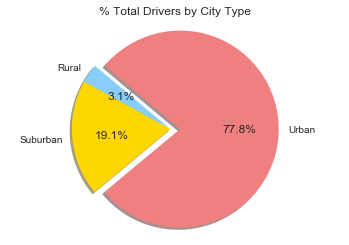

In [32]:
# Prints our pie chart to the screen
plt.show()